# Assignment 3 - Probability & Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Q1: Bernoulli and Binomial Distributions

In [2]:
# Bernoulli Distribution
p = 0.6  # probability of success
bernoulli_samples = np.random.binomial(1, p, 1000)

mean_bern = np.mean(bernoulli_samples)
var_bern = np.var(bernoulli_samples)

print("Bernoulli Distribution (p=0.6):")
print("Mean:", mean_bern)
print("Variance:", var_bern)
print("Theoretical Mean:", p)
print("Theoretical Variance:", p*(1-p))

Bernoulli Distribution (p=0.6):
Mean: 0.596
Variance: 0.24078400000000005
Theoretical Mean: 0.6
Theoretical Variance: 0.24


In [3]:
# Binomial Distribution
n = 10  # number of trials
p = 0.6  # probability of success
binomial_samples = np.random.binomial(n, p, 1000)

mean_binom = np.mean(binomial_samples)
var_binom = np.var(binomial_samples)

print("\nBinomial Distribution (n=10, p=0.6):")
print("Mean:", mean_binom)
print("Variance:", var_binom)
print("Theoretical Mean:", n*p)
print("Theoretical Variance:", n*p*(1-p))


Binomial Distribution (n=10, p=0.6):
Mean: 6.016
Variance: 2.463744
Theoretical Mean: 6.0
Theoretical Variance: 2.4000000000000004


## Q2: Normal Distribution and PDF

In [4]:
# Generate random samples from Normal distribution
mu = 0  # mean
sigma = 1  # standard deviation
samples = np.random.normal(mu, sigma, 1000)

print("Normal Distribution samples generated")
print("Mean:", np.mean(samples))
print("Std Dev:", np.std(samples))

Normal Distribution samples generated
Mean: 0.02672034364653185
Std Dev: 0.9972554763620101


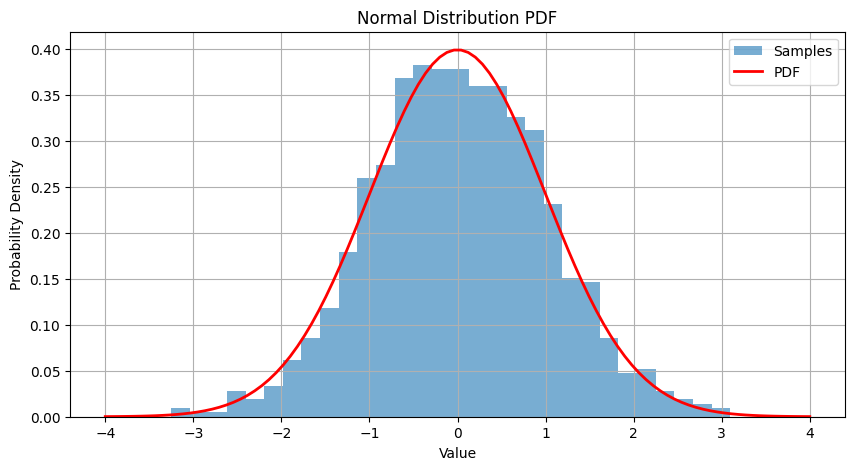

In [5]:
# Plot PDF
x = np.linspace(-4, 4, 100)
pdf = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Samples')
plt.plot(x, pdf, 'r-', linewidth=2, label='PDF')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution PDF')
plt.legend()
plt.grid(True)
plt.show()

## Q3: Covariance and Correlation

In [6]:
# Generate two random variables
X = np.random.normal(0, 1, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)  # Y is correlated with X

# Calculate covariance
covariance = np.cov(X, Y)[0, 1]

# Calculate correlation coefficient
correlation = np.corrcoef(X, Y)[0, 1]

print("Covariance:", covariance)
print("Correlation coefficient:", correlation)

Covariance: 1.9935802702775396
Correlation coefficient: 0.9729406497892414


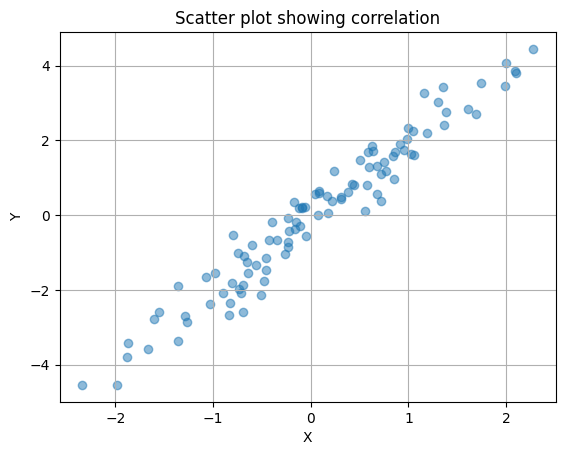

In [7]:
# Plot the relationship
plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot showing correlation')
plt.grid(True)
plt.show()

## Q4: Central Limit Theorem

In [8]:
# Generate sample means
sample_size = 30
num_samples = 1000
sample_means = []

for i in range(num_samples):
    sample = np.random.exponential(scale=2, size=sample_size)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)
print("Mean of sample means:", np.mean(sample_means))
print("Std of sample means:", np.std(sample_means))

Mean of sample means: 2.00026767376549
Std of sample means: 0.3697623119136744


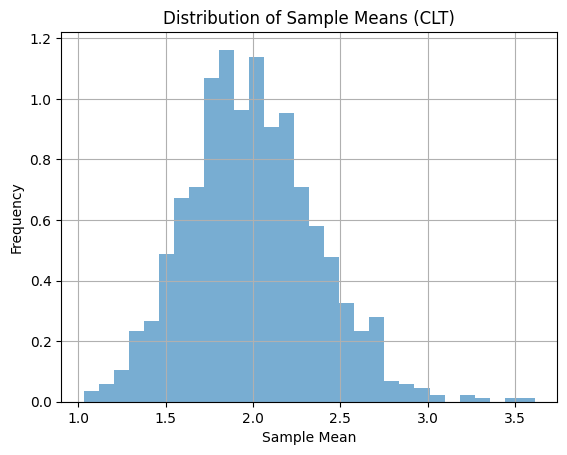


The distribution looks normal - this verifies CLT!


In [9]:
# Plot distribution of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means (CLT)')
plt.grid(True)
plt.show()

print("\nThe distribution looks normal - this verifies CLT!")

## Q5: KNN Classifier

### Using btissue.csv dataset

In [10]:
# Load dataset
df = pd.read_csv('btissue.csv')
print("Dataset loaded, shape:", df.shape)
print(df.head())

Dataset loaded, shape: (106, 10)
           I0     PA500       HFS          DA          Area       A/DA  \
0  524.794072  0.187448  0.032114  228.800228   6843.598481  29.910803   
1  330.000000  0.226893  0.265290  121.154201   3163.239472  26.109202   
2  551.879287  0.232478  0.063530  264.804935  11888.391830  44.894903   
3  380.000000  0.240855  0.286234  137.640111   5402.171180  39.248524   
4  362.831266  0.200713  0.244346  124.912559   3290.462446  26.342127   

      Max IP          DR           P class  
0  60.204880  220.737212  556.828334   car  
1  69.717361   99.084964  400.225776   car  
2  77.793297  253.785300  656.769449   car  
3  88.758446  105.198568  493.701814   car  
4  69.389389  103.866552  424.796503   car  


In [11]:
# Separate features and target
X = df.iloc[:, :-1]  # all columns except last
y = df.iloc[:, -1]   # last column is target

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (106, 9)
Target shape: (106,)


In [12]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (74, 9)
Test set: (32, 9)


In [13]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("KNN model trained!")

KNN model trained!


In [14]:
# Predict on test data
y_pred = knn.predict(X_test)

print("Predictions made!")

Predictions made!


In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Accuracy %:", accuracy * 100)

Accuracy: 0.46875
Accuracy %: 46.875
